### Group members:
- Sadeem Saad Alnfeisah
- Lulu Fahad Altuwijri
- Wasan Salem Alowayed


### First we will import important libraries:
 - the first one is to Read from the other folder "heart.csv" the DataBase
 - the second impoet we have used it to split our DataBase into training examples and testing examples
 - the third import is to use a Function called "DecisionTreeClassifier"
 - the fourth import is to o use a Function called "confusion_matrix" to allow us to see where our model is make a    mistake
 - the fifth import is used to Viuilaize our model tree 

In [227]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree

### Read the Dataset:
This line to read the Data from the other folder "heart.csv" by using the Function "read_csv"

In [228]:
dataBase = pd.read_csv('heart.csv')

### Split the Attributes:
Now we need to split our Attributes into two lists
 - allAtt: we will put all the attributes on it except the target att
 - targetAtt: we will put on it just the target att

Then, we have to create a new DataSets and they are SubSet of DataBase
 - inputs: it is a new DataSet that contains all attributes except the target attribute
 - output: it is a new DataSet that contains the target attribute

In [229]:
allAtt = ['age','sex','cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
targetAtt = ['0','1']
inputs = dataBase[allAtt]
output = dataBase['target']

### Split the Dataset:
Now we need to use the second import to split our Dataset into:
 - TrainData
 - TestData

By using "train_test_split" Function, we give three parameters:
 - the labeld data - in our program inputs and output-
 - the size of trainig data = 0.7 & test data = 0.3

In [230]:
(allAtt_train, allAtt_test, targetAtt_train, targetAtt_test) = train_test_split(inputs, output, train_size=0.7)

### Create the decesion tree classifier:
Now we need to:

In line 1: to create a decesion tree classifier to train it later.

In line 2: we give it labeled data (input + output) to teach our classifier.

In line 3: we want to test our classifier by giving it unlabeld data we want it to predict the output by using "predict" Function

In line 4: print number of nodes

In [231]:
classifier = DecisionTreeClassifier(random_state= 0) 
x = classifier.fit(allAtt_train,targetAtt_train).tree_.node_count 
predictUnLabel = classifier.predict(allAtt_test)
print("Number of nodes in this tree is:",x)

Number of nodes in this tree is: 69


### Confusion Matrix:
Now we want to construct and print the Confusion Matrix to see where our classifier makes an error by comparing targetAtt_test with predictUnLabel, then we print the output of the function

In [232]:
printConfusionMat = confusion_matrix(targetAtt_test, predictUnLabel)
print("The Confusion Matrix of classifier is: \n")
print(printConfusionMat)

The Confusion Matrix of classifier is: 

[[28 17]
 [ 7 39]]


### Print the tree:
Now we need to visualaize our classifier tree
 - the first function is to change the size of the figure since it was too small by specifieng the heigh and the width both = 30 
 - the second function is taking our model classifier then generate to us decesion tree 
 - the third function is to show the output of the decesion tree -without it text is shown with the tree- 

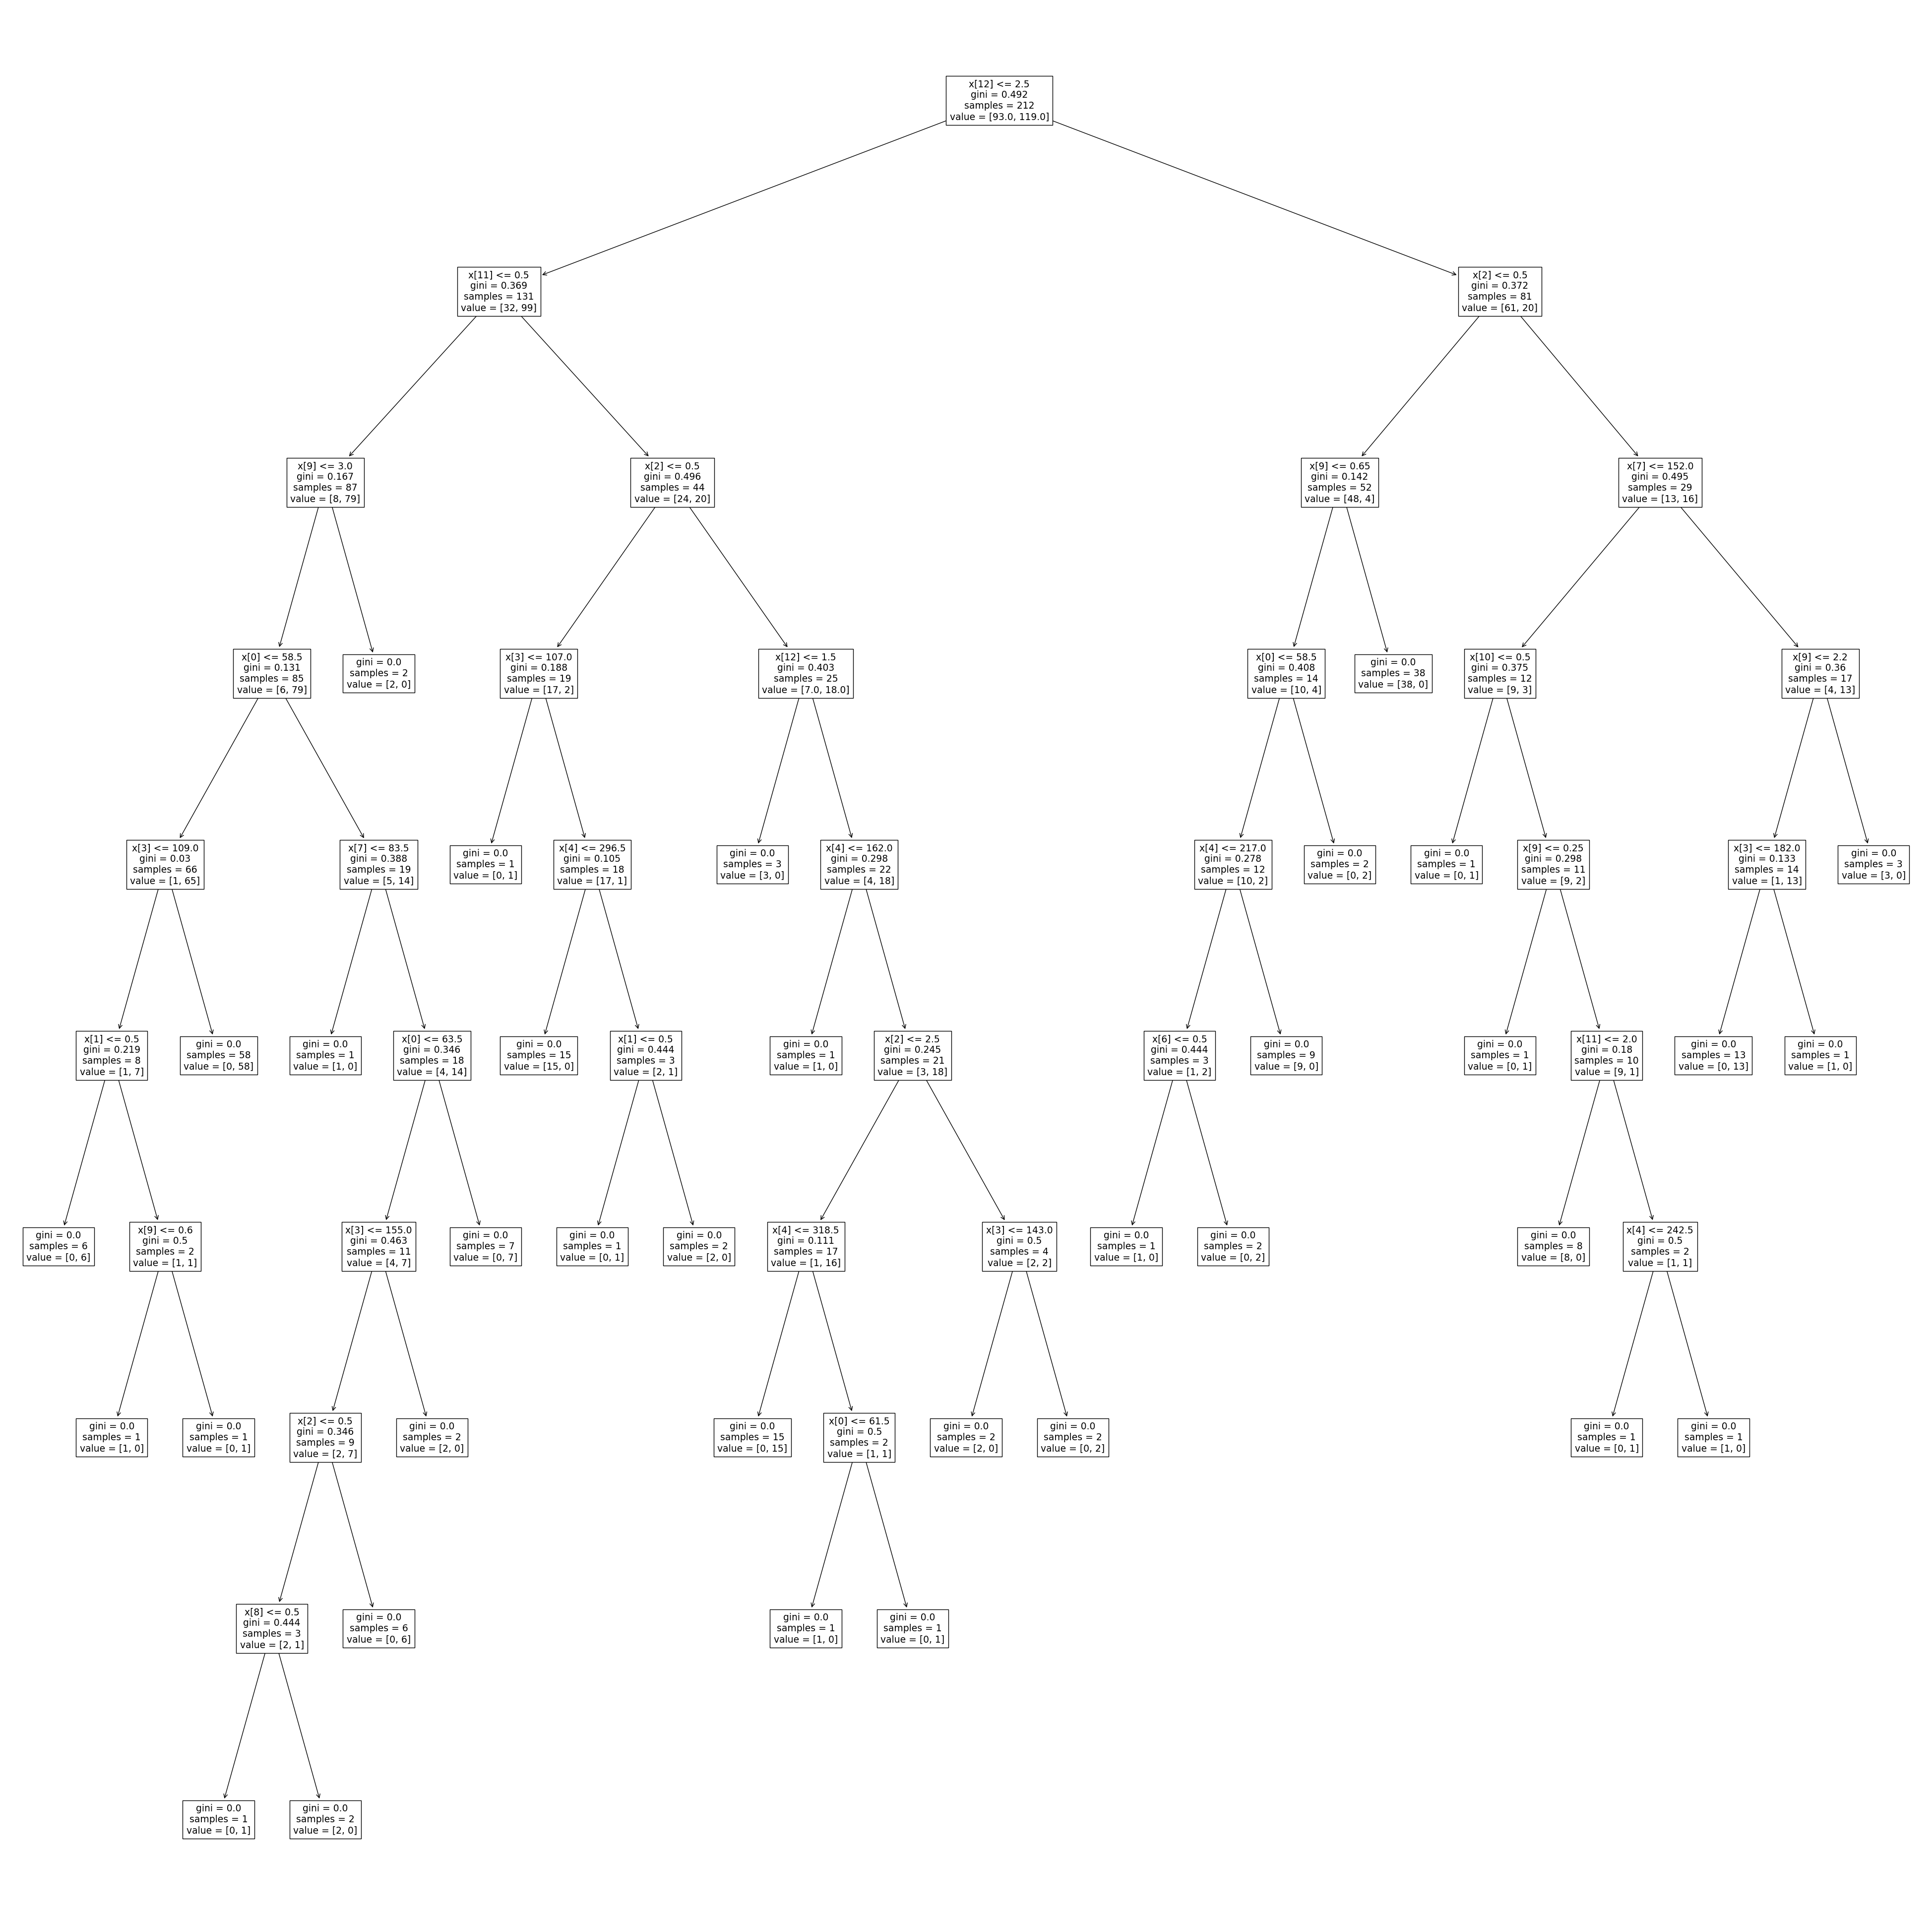

In [233]:
plt.figure(figsize = (50,50))
plot_tree(classifier)
plt.show()

### Performance:
The last thing we want to measure the performance of our model "classifier" by using a Function called "score", first for the training data  then for testing data to compare them. 

In [234]:
classifierAccuracyTrain = classifier.score(allAtt_train,targetAtt_train)
print("The Accuracy measure of classifier model for training data is = " , classifierAccuracyTrain)
classifierAccuracyTest = classifier.score(allAtt_test, targetAtt_test)
print("The Accuracy measure of classifier model for testing data is = " , classifierAccuracyTest)

The Accuracy measure of classifier model for training data is =  1.0
The Accuracy measure of classifier model for testing data is =  0.7362637362637363


### Note: 
the accuracy for training data is 1 (100%) while the accuracy for testing data is 0.73 (~ 73%) this mean there is an overfitting

### Tackling the overfitting problem:

To prevent the overfitting we will use post pruning technique. 

We call function 'cost_complexity_pruning_path' and give it the training attribute and the training target then it will generate two parameters: 

1- ccp_alphas: "cost complexit parameter", it is an array that provides a set of alpha values, if this parameter has large value, then the number of pruned nodes will increase. It decide what depth should be use.

2- impurities: it is an array of impurity values corresponding to different alpha values (specific pruning level). Its value will change when tree is pruned at different levels. (we don't need to use it)

In [235]:
p = classifier.cost_complexity_pruning_path(allAtt_train, targetAtt_train)
ccp_alphas = p.ccp_alphas
impurities = p.impurities

In [236]:
classifiers = [] #set to store all classifiers with different ccp_alphas value

#loop using ccp_alphas values to assign it to the classifier 
for ccp_alpha in ccp_alphas:
    classifier = DecisionTreeClassifier(random_state= 0, ccp_alpha = ccp_alpha)#when we assign ccp_alpha value this mean the Decision Tree will pruned at different levels according to this value
    classifier.fit(allAtt_train,targetAtt_train)
    classifiers.append(classifier)

### Compare the different classifiers performance:
Now we will measure the performance for each classifier on the training and testing data, then print the graph to compare them to choose ccp_alpha value that in the point that training and testing data have the closet accuracy to each other on this point.

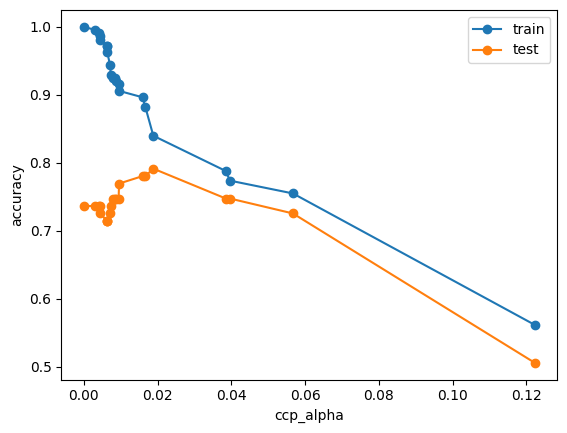

In [237]:
score_train = [classifier.score(allAtt_train, targetAtt_train) for classifier in classifiers]#set to store the accuracy for training of the classifiers 
score_test = [classifier.score(allAtt_test, targetAtt_test) for classifier in classifiers]#set to store the accuracy for testing of the classifiers 

#create graph
fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alphas, score_train, marker = 'o', label = 'train')
ax.plot(ccp_alphas, score_test, marker = 'o', label = 'test')
ax.legend()
plt.show()

### Note:
We note that the point at which the accuracy value of the training and testing data are close has ccp_alpha = 0.05. Now we use this ccp_alpha value to create new classifier to prune the tree.

In [238]:
classifier = DecisionTreeClassifier(random_state=0, ccp_alpha=0.05) 
x = classifier.fit(allAtt_train,targetAtt_train).tree_.node_count
predictUnLabel = classifier.predict(allAtt_test)
print("Number of nodes in this tree after prunning is:",x)

Number of nodes in this tree after prunning is: 5


In [239]:
classifierAccuracyTrain = classifier.score(allAtt_train,targetAtt_train)
print("The Accuracy measure of classifier model for training data after prunning is = " , classifierAccuracyTrain)
classifierAccuracyTest = classifier.score(allAtt_test, targetAtt_test)
print("The Accuracy measure of classifier model for testing data after prunning is = " , classifierAccuracyTest)

The Accuracy measure of classifier model for training data after prunning is =  0.7735849056603774
The Accuracy measure of classifier model for testing data after prunning is =  0.7472527472527473


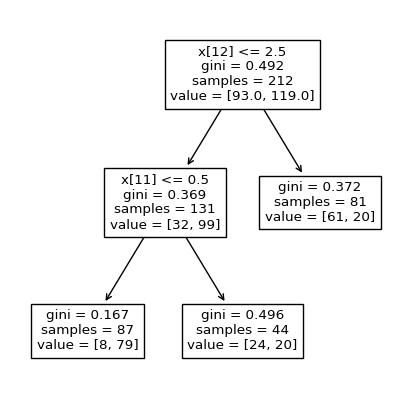

In [240]:
plt.figure(figsize = (5,5))
plot_tree(classifier)
plt.show()

### conclusion:
finally, we noted that after prevent the overfitting:

- number of nodes decreased from 69 nodes to 5 nodes
- the accuracy value of the training and testing data are close. the training data have accuracy = 0.77 (77%), whihle the testing data have accuracy = 0.74 (74%)

So the model became more general.